In [1]:
import datetime
import pyucrio
import cartopy.crs
import numpy as np

rio = pyucrio.PyUCRio()
rio_tools = rio.tools

/opt/miniconda/envs/pyucrio311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Plotting Riometer Site Locations on a map

Using our tools, it is straightforward to make maps of an instrument's location, at specific sites, or across all sites. Below are several examples of doing so.

## Plotting FoV for an instrument by site

In [2]:
# Define your map projection
center_lat = -100.0
center_lon = 55.0
projection_obj = cartopy.crs.NearsidePerspective(central_longitude=center_lat, central_latitude=center_lon)

# Create the SiteMap object
rio_map = rio_tools.site_map.create_map(projection_obj, instrument_array='swan_hsr', site_uid_list = ['mean'], color='red', sym_size=5)

rio_map

SiteMap(cartopy_projection=Projection(+proj=nsper +a=6378137.0 +lon_0=-100.0 +lat_0=55.0 +h=35785831 +x_0=0 +y_0=0 +units=m +no_defs +type=crs), site_locations=Dict[1 site(s) across 1 instrument(s)], site_uid_list=[['mean']], instrument_array(s)=['swan_hsr'])

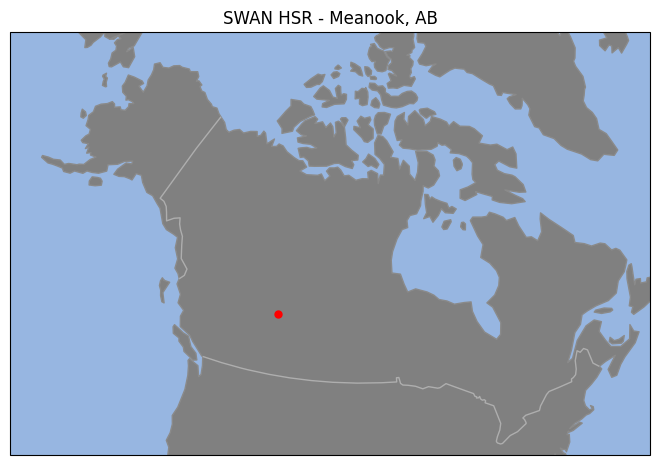

In [3]:
# Plot the map
map_extent = [-145, -65, 35, 80]
rio_map.plot(map_extent, title='SWAN HSR - Meanook, AB', label=False)

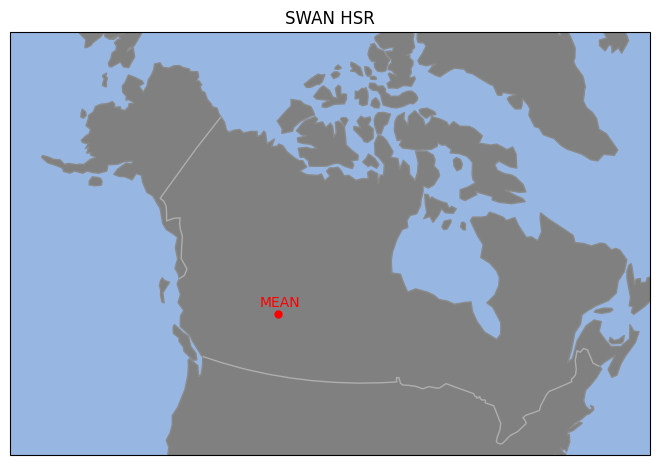

In [4]:
# Instead, plot with labels
rio_map.plot(map_extent, title='SWAN HSR', label=True, upper_label=True)

## Plotting an entire array of riometers

Maybe you'd like to see the location of all NORSTAR Riometers

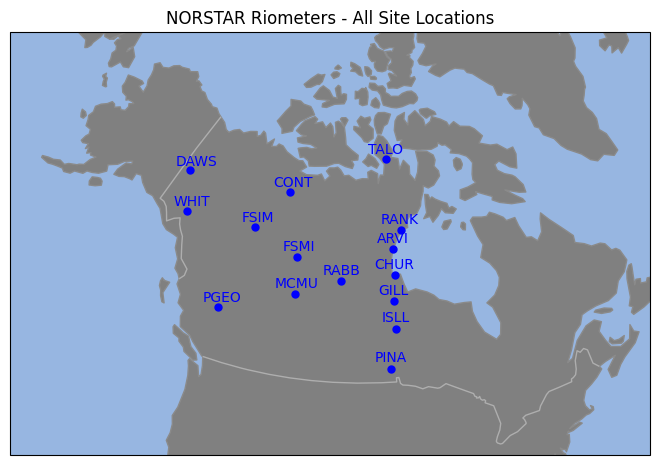

In [5]:
# Define your map projection
center_lat = -100.0
center_lon = 55.0
projection_obj = cartopy.crs.NearsidePerspective(central_longitude=center_lat, central_latitude=center_lon)

# Create the SiteMap object - This time, we omit the site_uid_list so all sites will be plotted
rio_map = rio_tools.site_map.create_map(projection_obj, instrument_array='norstar_riometer', color='blue', sym_size=5)
rio_map.plot(map_extent, title='NORSTAR Riometers - All Site Locations', label=True, upper_label=True)

You can also overplot other contours, lines of constant lat/lon, etc. just as you would for a mosaic!

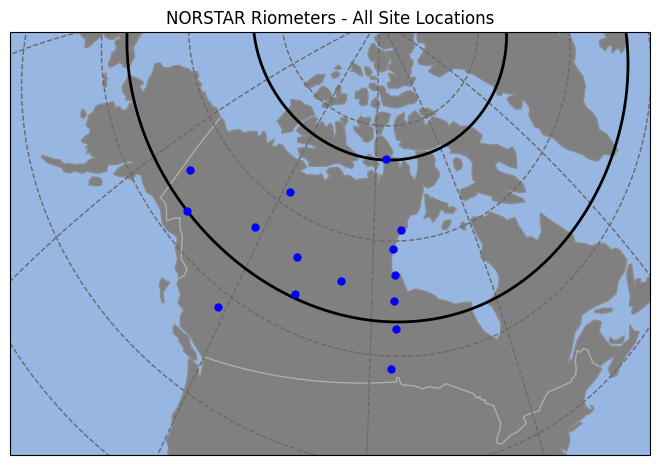

In [6]:
# add geographic gridlines using many lines of constant lat and lon. These will go behind the image data
lat_locs = np.arange(0, 90, 10)
lon_locs = np.arange(-180, 40, 30)

# Add Geomagnetic gridlines
rio_map.add_mag_contours(timestamp=datetime.datetime.today(), constant_lats=lat_locs, constant_lons=lon_locs, linestyle="--", color="dimgray")

# Overplot two specifi lines of geomagnetic lat
rio_map.add_mag_contours(timestamp=datetime.datetime.today(), constant_lats=[63,77], color="black", linewidth=2)

rio_map.plot(map_extent, label=False, title='NORSTAR Riometers - All Site Locations')

## Plotting Riometer Locations based on data availability

Maybe you'd like to plot the locations of a particular array of ASIs, only for riometers that actually took data for a given time range... This can be achieved using the SiteMap object's built-in `add_availability` method:

In [7]:
rio.data.ucalgary.list_datasets()

[Dataset(name=NORSTAR_RIOMETER_K0_TXT, short_description='NORSTAR Single Frequency Riometers K0 raw data, in ASCII format', provider='UCalgary', level='L0', doi_details='https://commons.datacite.org/doi.org/10.11575/afyx-m516', ...),
 Dataset(name=NORSTAR_RIOMETER_K2_TXT, short_description='NORSTAR Single Frequency Riometers K2 baselined data, in ASCII format', provider='UCalgary', level='L2', doi_details='https://commons.datacite.org/doi.org/10.11575/afyx-m516', ...),
 Dataset(name=SWAN_HSR_K0_H5, short_description='SWAN Hyper Spectral Riometer (HSR) K0 raw data, in HDF5 format', provider='UCalgary', level='L0', doi_details='https://commons.datacite.org/doi.org/10.11575/anh5-aw08', ...),
 Dataset(name=SWAN_HSR_K0_SUMMARY_PLOT_JPG, short_description='SWAN Hyper Spectral Riometer (HSR) K0 raw data summary plots, in JPG format', provider='UCalgary', level='L0', doi_details='https://commons.datacite.org/doi.org/10.11575/anh5-aw08', ...)]

Let's plot all Norstar Riometers, with available K0 data within on 2024/01/01

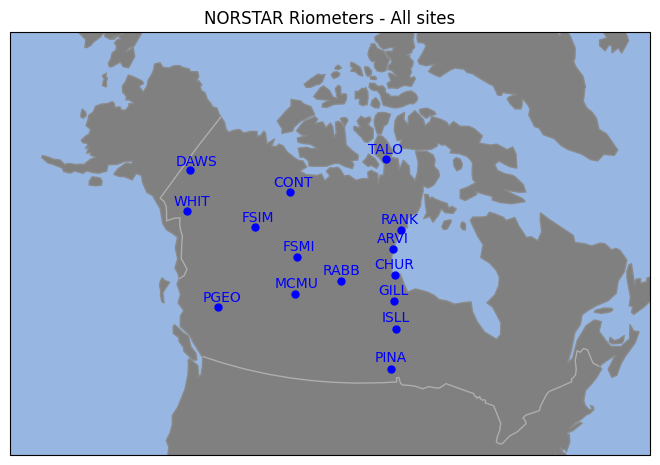

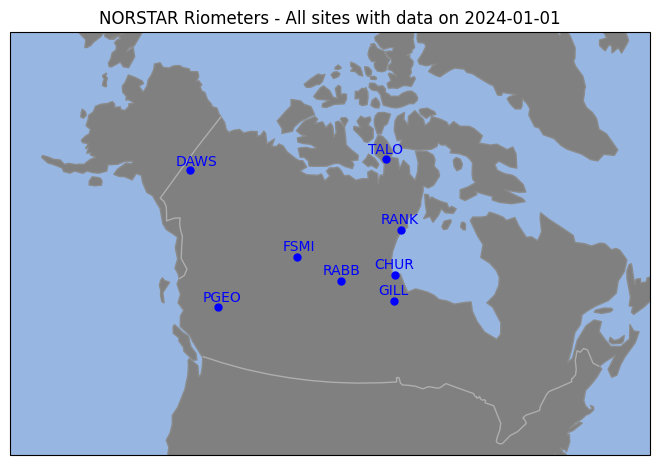

In [8]:
# We will look for sites that have data anytime on 2024-01-01
start = datetime.datetime(2024, 1, 1, 0, 0)
end = datetime.datetime(2024, 1, 1, 23, 59)

# Define your map projection
center_lat = -100.0
center_lon = 55.0
projection_obj = cartopy.crs.NearsidePerspective(central_longitude=center_lat, central_latitude=center_lon)

# Create the SiteMap object - This time, we omit the site_uid_list so all sites will be plotted
rio_map = rio_tools.site_map.create_map(projection_obj, instrument_array='norstar_riometer', color='blue', sym_size=5)

# Now all the add_availibility function
rio_map.add_availability(dataset_name="NORSTAR_RIOMETER_K0_TXT", start=start, end=end)

# plot once without enforcing availability
rio_map.plot(map_extent, title='NORSTAR Riometers - All sites', label=True, upper_label=True)

# plot again, enforcing availability 
rio_map.plot(map_extent, title=f'NORSTAR Riometers - All sites with data on {start.date()}', label=True, upper_label=True, enforce_data_availability=True)

## Plotting site locations for more than one type of riometer

You may also be interested in plotting the location of multiple different riometer instrument arrays, for example, SWAN HSR and NORSTAR Riometers.

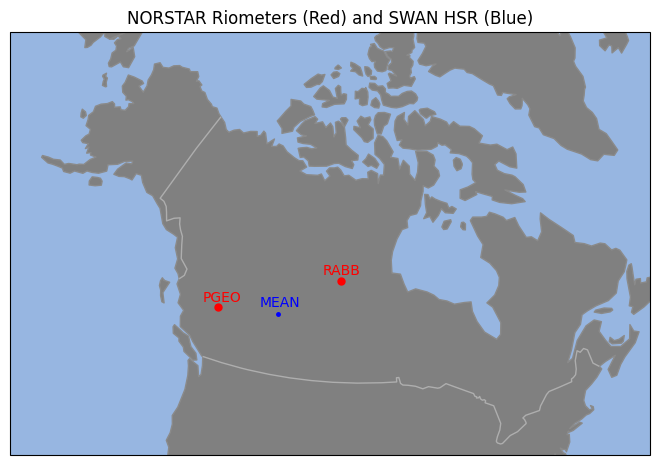

In [9]:
# Define your map projection
center_lat = -100.0
center_lon = 55.0
projection_obj = cartopy.crs.NearsidePerspective(central_longitude=center_lat, central_latitude=center_lon)

# Create the SiteMap object - This time, we use two different instrument_arrays, passed as a list
instrument_list = ["norstar_riometer", "swan_hsr"]

# For specific sites, we need to seperate lists
norstar_sites = ["pgeo", "rabb"]
swan_sites = ["mean"]

rio_map = rio_tools.site_map.create_map(projection_obj, instrument_array=instrument_list, site_uid_list=[norstar_sites, swan_sites], color=['red', 'blue'], sym_size=5, symbol=['o', '.'])


rio_map.plot(map_extent, title='NORSTAR Riometers (Red) and SWAN HSR (Blue)', label=True, upper_label=True)

Instead, you could also plot all sites from both instrument arrays

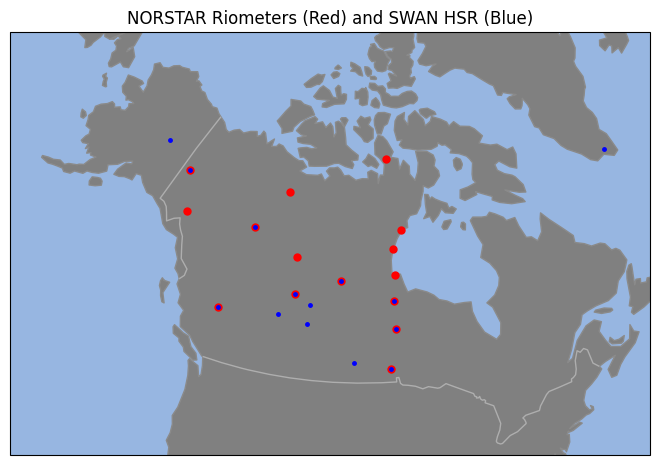

In [10]:
rio_map = rio_tools.site_map.create_map(projection_obj, instrument_array=instrument_list, color=['red', 'blue'], sym_size=5, symbol=['o', '.'])


rio_map.plot(map_extent, title='NORSTAR Riometers (Red) and SWAN HSR (Blue)', label=False)